In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [2]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [3]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [5]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [9]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [10]:
# 3. MLP + Sigmoid activation + ADAM


model_sigmoid_ADAM = Sequential()
model_sigmoid_ADAM.add(Dense(128, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid_ADAM.add(Dense(64, activation='sigmoid'))
model_sigmoid_ADAM.add(Dense(output_dim, activation='softmax'))

model_sigmoid_ADAM.summary()

model_sigmoid_ADAM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid_ADAM.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 32,645
Trainable params: 32,645
Non-trainable params: 0
_________________________________________________________________

Train on 87554 samples, validate on 21892 samples
Epoch 1/500
87554/87554 [==============================] - 2s 24us/step - loss: 0.5707 - accuracy: 0.8213 - val_loss: 0.3916 - val_accuracy: 0.8889
Epoch 2/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.3471 - accuracy: 0.9052 - val_loss: 0.3168 - val_accuracy: 0.9148
Epoch 3/500
87554/87554 [========

87554/87554 [==============================] - 1s 17us/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0895 - val_accuracy: 0.9780
Epoch 50/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0933 - val_accuracy: 0.9766
Epoch 51/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.0901 - val_accuracy: 0.9779
Epoch 52/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0344 - accuracy: 0.9898 - val_loss: 0.0906 - val_accuracy: 0.9782
Epoch 53/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.0909 - val_accuracy: 0.9776
Epoch 54/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.0333 - accuracy: 0.9905 - val_loss: 0.0922 - val_accuracy: 0.9785
Epoch 55/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 

87554/87554 [==============================] - 2s 21us/step - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.1214 - val_accuracy: 0.9774
Epoch 105/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.1295 - val_accuracy: 0.9758
Epoch 106/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.1226 - val_accuracy: 0.9771
Epoch 107/500
87554/87554 [==============================] - 2s 26us/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.1265 - val_accuracy: 0.9769
Epoch 108/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.1249 - val_accuracy: 0.9764
Epoch 109/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.1274 - val_accuracy: 0.9744
Epoch 110/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0137 - accuracy: 0.9958 - val_

Epoch 159/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.1583 - val_accuracy: 0.9757
Epoch 160/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.1601 - val_accuracy: 0.9755
Epoch 161/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.1601 - val_accuracy: 0.9767
Epoch 162/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.1612 - val_accuracy: 0.9773
Epoch 163/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.1613 - val_accuracy: 0.9764
Epoch 164/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.1675 - val_accuracy: 0.9769
Epoch 165/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0061 - accuracy:

87554/87554 [==============================] - 2s 20us/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.1937 - val_accuracy: 0.9765
Epoch 214/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1933 - val_accuracy: 0.9759
Epoch 215/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1946 - val_accuracy: 0.9761
Epoch 216/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.2003 - val_accuracy: 0.9764
Epoch 217/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.1985 - val_accuracy: 0.9770
Epoch 218/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.2028 - val_accuracy: 0.9760
Epoch 219/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0034 - accuracy: 0.9991 - val_

Epoch 268/500
87554/87554 [==============================] - 2s 25us/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.2226 - val_accuracy: 0.9759
Epoch 269/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.2362 - val_accuracy: 0.9772
Epoch 270/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.2192 - val_accuracy: 0.9761
Epoch 271/500
87554/87554 [==============================] - 2s 26us/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.2233 - val_accuracy: 0.9752
Epoch 272/500
87554/87554 [==============================] - 2s 24us/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.2154 - val_accuracy: 0.9760
Epoch 273/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.2184 - val_accuracy: 0.9765
Epoch 274/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0018 - accuracy:

87554/87554 [==============================] - 2s 22us/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.2233 - val_accuracy: 0.9761
Epoch 323/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.2243 - val_accuracy: 0.9765
Epoch 324/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2262 - val_accuracy: 0.9767
Epoch 325/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2261 - val_accuracy: 0.9769
Epoch 326/500
87554/87554 [==============================] - 2s 24us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.2277 - val_accuracy: 0.9762
Epoch 327/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.2283 - val_accuracy: 0.9751
Epoch 328/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0020 - accuracy: 0.9994 - val_

87554/87554 [==============================] - 2s 21us/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.2442 - val_accuracy: 0.9766
Epoch 377/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2437 - val_accuracy: 0.9767
Epoch 378/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.2440 - val_accuracy: 0.9765
Epoch 379/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2440 - val_accuracy: 0.9763
Epoch 380/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.2414 - val_accuracy: 0.9760
Epoch 381/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2431 - val_accuracy: 0.9757
Epoch 382/500
87554/87554 [==============================] - 1s 17us/step - loss: 8.7327e-04 - accuracy: 0.9998 - 

87554/87554 [==============================] - 1s 17us/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.2638 - val_accuracy: 0.9764
Epoch 431/500
87554/87554 [==============================] - 2s 28us/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.2633 - val_accuracy: 0.9766
Epoch 432/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.2467 - val_accuracy: 0.9769
Epoch 433/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.2505 - val_accuracy: 0.9766
Epoch 434/500
87554/87554 [==============================] - 1s 16us/step - loss: 8.3190e-04 - accuracy: 0.9998 - val_loss: 0.2508 - val_accuracy: 0.9765
Epoch 435/500
87554/87554 [==============================] - 1s 15us/step - loss: 6.0569e-04 - accuracy: 0.9998 - val_loss: 0.2508 - val_accuracy: 0.9766
Epoch 436/500
87554/87554 [==============================] - 1s 16us/step - loss: 7.1988e-04 - accuracy: 0

Epoch 484/500
87554/87554 [==============================] - 1s 15us/step - loss: 5.3333e-04 - accuracy: 0.9999 - val_loss: 0.2600 - val_accuracy: 0.9761
Epoch 485/500
87554/87554 [==============================] - 2s 18us/step - loss: 6.6327e-04 - accuracy: 0.9997 - val_loss: 0.2606 - val_accuracy: 0.9764
Epoch 486/500
87554/87554 [==============================] - 1s 15us/step - loss: 5.9074e-04 - accuracy: 0.9998 - val_loss: 0.2647 - val_accuracy: 0.9773
Epoch 487/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.2824 - val_accuracy: 0.9763
Epoch 488/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.2515 - val_accuracy: 0.9757
Epoch 489/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.2529 - val_accuracy: 0.9757
Epoch 490/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.0010

In [11]:
y_pred = model_sigmoid_ADAM.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.81      0.73      0.76       556
           2       0.94      0.94      0.94      1448
           3       0.84      0.77      0.80       162
           4       0.98      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.88      0.89     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.2513332234385764
Test accuracy: 0.977160632610321


<IPython.core.display.Javascript object>


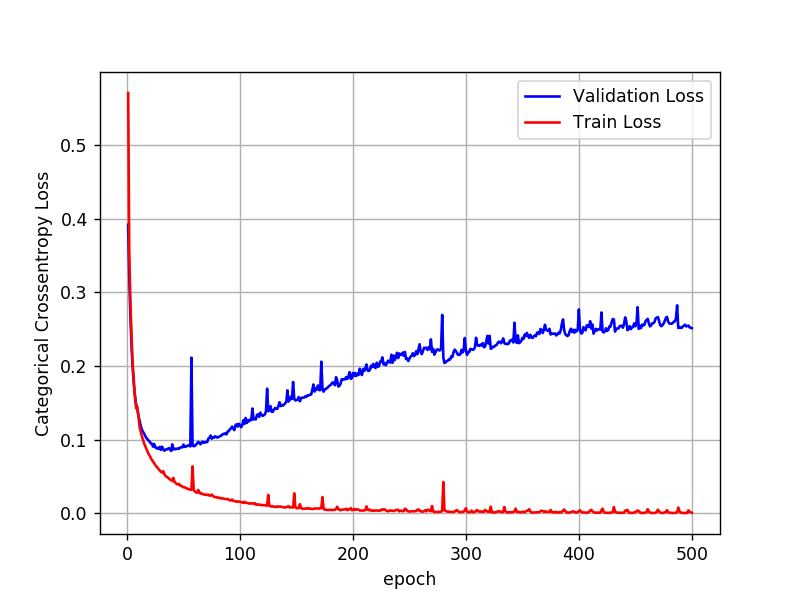

In [12]:
score = model_sigmoid_ADAM.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [13]:
#              precision    recall  f1-score   support

#           0       0.99      0.99      0.99     18118
#           1       0.81      0.73      0.76       556
#           2       0.94      0.94      0.94      1448
#           3       0.84      0.77      0.80       162
#           4       0.98      0.97      0.98      1608

#    accuracy                           0.98     21892
#   macro avg       0.91      0.88      0.89     21892
# weighted avg       0.98      0.98      0.98     21892

# Test score: 0.2513332234385764
# Test accuracy: 0.977160632610321